In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from keras.datasets import mnist, fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Data Exploration

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

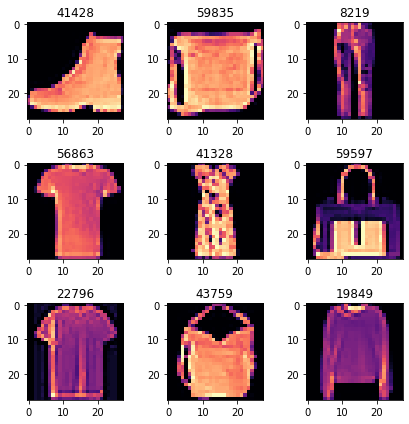

In [4]:
#plot random images
figure, axes = plt.subplots(3,3,figsize=(6,6))
axes = axes.reshape(9)
for i,index in enumerate(np.random.randint(0,59999,9)):
    axes[i].imshow(x_train[index], cmap=plt.cm.magma)
    axes[i].set_title(str(index))
    plt.tight_layout()

In [5]:
x_train_float = x_train.astype('float32')
x_test_float = x_test.astype('float32')

x_train_float /= 255
x_test_float /= 255

x_train_final = x_train_float.reshape(x_train_float.shape[0], 28, 28, 1)
x_test_final = x_test_float.reshape(x_test_float.shape[0], 28, 28, 1)

In [6]:
categories = {0: 'T-shirt/top',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'Bag',
             9: 'Boot'}

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [7]:
x_train_sample = x_train_final[0:1000]
y_train_sample = y_train_cat[0:1000]

x_test_sample = x_test_final[0:1000]
y_test_sample = y_test_cat[0:1000]

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train_sample.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

datagen = ImageDataGenerator(rotation_range=10,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)

epochs = 3
batch_size = 100
history = model.fit_generator(datagen.flow(x_train_sample, y_train_sample, batch_size=batch_size), epochs=epochs,
                             validation_data=(x_test_sample, y_test_sample), steps_per_epoch=x_train_sample.shape[0//batch_size])


Epoch 1/3
1000/1000 [==============================] - 118s 118ms/step - loss: 0.6634 - accuracy: 0.7488 - val_loss: 0.5915 - val_accuracy: 0.8010
Epoch 2/3
1000/1000 [==============================] - 109s 109ms/step - loss: 0.3225 - accuracy: 0.8788 - val_loss: 0.6753 - val_accuracy: 0.8210
Epoch 3/3
1000/1000 [==============================] - 103s 103ms/step - loss: 0.2032 - accuracy: 0.9238 - val_loss: 0.7871 - val_accuracy: 0.8310


In [277]:
history.history

{'val_loss': [0.805557906627655, 1.064076542854309, 1.2578840255737305],
 'val_accuracy': [0.8320000171661377, 0.8410000205039978, 0.8320000171661377],
 'loss': [0.3812308212444186, 0.09899189792945981, 0.05101178815960884],
 'accuracy': [0.856587, 0.964123, 0.982327]}

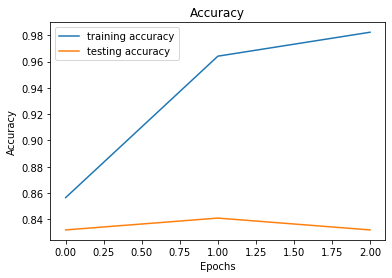

In [278]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

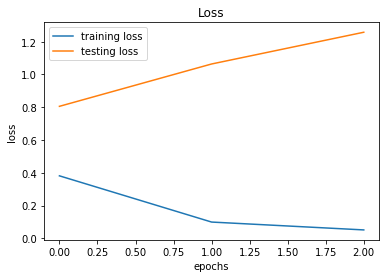

In [279]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [85]:
#save and load a model
model.save('mnist_fashion.model')
new_model = tf.keras.models.load_model('mnist_fashion.model')
predictions = new_model.predict(x_test)

import numpy as np
print(np.argmax(predictions[0]))

INFO:tensorflow:Assets written to: epic_num_reader.model/assets
7
